## Chapter 5

In [6]:
from collections import Counter
from linear_algebra import sum_of_squares, dot
import matplotlib.pyplot as plt
import math

In [7]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

def make_friend_counts_histogram(plt):
    friend_counts = Counter(num_friends)
    xs = range(101)
    ys = [friend_counts[x] for x in xs]
    plt.bar(xs, ys)
    plt.axis([0,101,0,25])
    plt.title("Histogram of Friend Counts")
    plt.xlabel("# of friends")
    plt.ylabel("# of people")
    plt.show()

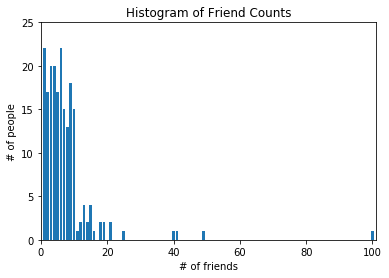

In [8]:
make_friend_counts_histogram(plt)

In [9]:
num_points = len(num_friends)               
num_points

204

In [12]:
largest_value = max(num_friends)
print(largest_value)
smallest_value = min(num_friends)
print(smallest_value)
sorted_values = sorted(num_friends)


100
1


In [13]:
smallest_value = sorted_values[0]           
second_smallest_value = sorted_values[1]    
second_largest_value = sorted_values[-2]

In [14]:
smallest_value

1

In [15]:
second_smallest_value

1

In [16]:
second_largest_value

49

In [17]:
def mean(x):
    return sum(x) / len(x)

In [18]:
mean(num_friends)

7.333333333333333

In [20]:
def median(v):
    """finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2

    if n % 2 == 1:
        # if odd, return the middle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
median(num_friends)

6.0

In [21]:
def quantile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

In [22]:
quantile(num_friends, 0.05)

1

In [23]:
quantile(num_friends, 0.90)

13

In [24]:
quantile(num_friends, 0.50)

6

In [25]:
def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]
mode(num_friends)

[6, 1]

In [26]:
def data_range(x):
    return max(x) - min(x)
data_range(num_friends) 

99

In [27]:
def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

In [28]:
def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

In [29]:
variance(num_friends) 

81.54351395730716

In [30]:
def standard_deviation(x):
    return math.sqrt(variance(x))
standard_deviation(num_friends)

9.03014473623248

In [31]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)
interquartile_range(num_friends)

6

In [32]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]


In [33]:
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)
covariance(num_friends, daily_minutes)

22.425435139573064

In [34]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero
correlation(num_friends, daily_minutes)

0.24736957366478218

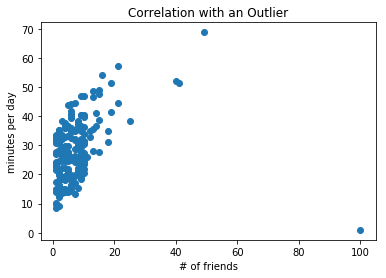

In [35]:
plt.scatter(num_friends, daily_minutes)
plt.xlabel('# of friends')
plt.ylabel('minutes per day')
plt.title('Correlation with an Outlier')
plt.show()

In [36]:
outlier = num_friends.index(100) 

In [37]:
num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

In [38]:
correlation(num_friends_good, daily_minutes_good) 

0.5736792115665573

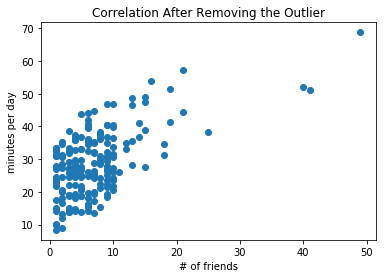

In [39]:
plt.scatter(num_friends_good, daily_minutes_good)
plt.xlabel('# of friends')
plt.ylabel('minutes per day')
plt.title('Correlation After Removing the Outlier')
plt.show()

### Chapter 6 Probability

In [40]:
import math, random

In [41]:
def random_kid():
  return random.choice(["boy", "girl"])
both_girls = 0
older_girl = 0
either_girl = 0
random.seed(0)
for _ in range(10000):
  younger = random_kid()
  older = random_kid()
  if older == "girl":
    older_girl += 1
  if older == "girl" and younger == "girl":
    both_girls += 1
  if older == "girl" or younger == "girl":
    either_girl += 1

In [42]:
print ("P(both | older):", both_girls / older_girl)

P(both | older): 0.5007089325501317


In [43]:
print ("P(both | either): ", both_girls / either_girl)

P(both | either):  0.3311897106109325


In [44]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

In [45]:
def uniform_cdf(x):
    "returns the probability that a uniform random variable is less than x"
    if x < 0:   return 0    # uniform random is never less than 0
    elif x < 1: return x    # e.g. P(X < 0.4) = 0.4
    else:       return 1    # uniform random is always less than 1

In [46]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

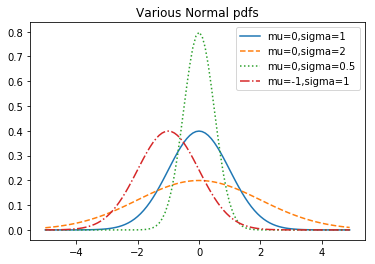

In [47]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

In [48]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

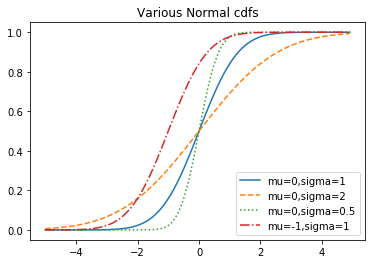

In [49]:
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()


In [50]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z, low_p = -10.0, 0            # normal_cdf(-10) is (very close to) 0
    hi_z,  hi_p  =  10.0, 1            # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break

    return mid_z

In [51]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

In [52]:
def binomial(p, n):
    return sum(bernoulli_trial(p) for _ in range(n))

In [53]:
def make_hist(p, n, num_points):

    data = [binomial(p, n) for _ in range(num_points)]

    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')

    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    plt.plot(xs,ys)
    plt.show()

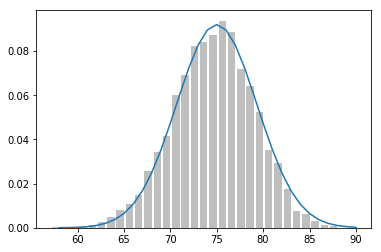

In [54]:
make_hist(0.75, 100, 10000)

### Chapter 7 Hypothesis and Inference

In [56]:
from probability import normal_cdf, inverse_normal_cdf

In [57]:
def normal_approximation_to_binomial(n, p):
    """finds mu and sigma corresponding to a Binomial(n, p)"""
    mu = p * n
    sigma = math.sqrt(p * (1 - p) * n)
    return mu, sigma

In [58]:
normal_probability_below = normal_cdf

In [59]:
def normal_probability_above(lo, mu=0, sigma=1):
    return 1 - normal_cdf(lo, mu, sigma)

In [60]:
def normal_probability_between(lo, hi, mu=0, sigma=1):
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

In [61]:
def normal_probability_outside(lo, hi, mu=0, sigma=1):
    return 1 - normal_probability_between(lo, hi, mu, sigma)

In [62]:
def normal_upper_bound(probability, mu=0, sigma=1):
    """returns the z for which P(Z <= z) = probability"""
    return inverse_normal_cdf(probability, mu, sigma)

In [63]:
def normal_lower_bound(probability, mu=0, sigma=1):
    """returns the z for which P(Z >= z) = probability"""
    return inverse_normal_cdf(1 - probability, mu, sigma)

In [64]:
def normal_two_sided_bounds(probability, mu=0, sigma=1):
    """returns the symmetric (about the mean) bounds
    that contain the specified probability"""
    tail_probability = (1 - probability) / 2

    # upper bound should have tail_probability above it
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)

    # lower bound should have tail_probability below it
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)

    return lower_bound, upper_bound

In [65]:
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)
mu_0, sigma_0

(500.0, 15.811388300841896)

In [66]:
normal_two_sided_bounds(0.95, mu_0, sigma_0)

(469.01026640487555, 530.9897335951244)

In [67]:
# 95% bounds based on assumption p is 0.5
lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)
lo, hi

(469.01026640487555, 530.9897335951244)

In [68]:
# actual mu and sigma based on p = 0.55
mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)
mu_1, sigma_1

(550.0, 15.732132722552274)

In [69]:
type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
power = 1 - type_2_probability
type_2_probability, power

(0.11345199870463285, 0.8865480012953671)

In [70]:
hi = normal_upper_bound(0.95, mu_0, sigma_0)
hi

526.0073585242053

In [71]:
type_2_probability = normal_probability_below(hi, mu_1, sigma_1)
type_2_probability

0.06362051966928267

In [72]:
power = 1 - type_2_probability 
power

0.9363794803307173

In [73]:
def two_sided_p_value(x, mu=0, sigma=1):
    if x >= mu:
        # if x is greater than the mean, the tail is above x
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        # if x is less than the mean, the tail is below x
        return 2 * normal_probability_below(x, mu, sigma)

In [74]:
two_sided_p_value(529.5, mu_0, sigma_0)

0.06207721579598835

In [75]:
extreme_value_count = 0
for _ in range(100000):
  num_heads = sum(1 if random.random() < 0.5 else 0    # count # of heads
                  for _ in range(1000))                               # in 1000 flips
  if num_heads >= 530 or num_heads <= 470:           # and count how often
      extreme_value_count += 1                         # the # is 'extreme'
print(extreme_value_count / 100000)


0.06249


In [76]:
two_sided_p_value(531.5, mu_0, sigma_0)

0.046345287837786575

In [78]:
upper_p_value = normal_probability_above
lower_p_value = normal_probability_below

In [79]:
upper_p_value(524.5, mu_0, sigma_0)

0.06062885772582072

In [80]:
upper_p_value(526.5, mu_0, sigma_0)

0.04686839508859242

math.sqrt(p * (1 - p) / 1000)  ## Here we donâ€™t know p, so instead we use our estimate

In [82]:
p_hat = 525 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000) 

In [83]:
normal_two_sided_bounds(0.95, mu, sigma)

(0.4940490278129096, 0.5559509721870904)

In [84]:
p_hat = 540 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000)
sigma

0.015760710643876435

In [85]:
normal_two_sided_bounds(0.95, mu, sigma) 

(0.5091095927295919, 0.5708904072704082)

In [86]:
def run_experiment():
    """flip a fair coin 1000 times, True = heads, False = tails"""
    return [random.random() < 0.5 for _ in range(1000)]

def reject_fairness(experiment):
    """using the 5% significance levels"""
    num_heads = len([flip for flip in experiment if flip])
    return num_heads < 469 or num_heads > 531

In [87]:
random.seed(0)
experiments = [run_experiment() for _ in range(1000)]
num_rejections = len([experiment
                      for experiment in experiments
                       if reject_fairness(experiment)])


In [88]:
print (num_rejections)

46


In [89]:
def estimated_parameters(N, n):
    p = n / N
    sigma = math.sqrt(p * (1 - p) / N)
    return p, sigma

In [90]:
def a_b_test_statistic(N_A, n_A, N_B, n_B):
    p_A, sigma_A = estimated_parameters(N_A, n_A)
    p_B, sigma_B = estimated_parameters(N_B, n_B)
    return (p_B - p_A) / math.sqrt(sigma_A ** 2 + sigma_B ** 2)

In [91]:
z = a_b_test_statistic(1000, 200, 1000, 180)

In [92]:
two_sided_p_value(z) 

0.254141976542236

In [93]:
z = a_b_test_statistic(1000, 200, 1000, 150) 
z

-2.948839123097944

In [94]:
two_sided_p_value(z)

0.003189699706216853

In [95]:
def B(alpha, beta):
    """a normalizing constant so that the total probability is 1"""
    return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)

In [96]:
def beta_pdf(x, alpha, beta):
    if x < 0 or x > 1:          # no weight outside of [0, 1]
        return 0
    return x ** (alpha - 1) * (1 - x) ** (beta - 1) / B(alpha, beta)

In [97]:
if __name__ == "__main__":

    mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)
    print("mu_0", mu_0)
    print("sigma_0", sigma_0)
    print("normal_two_sided_bounds(0.95, mu_0, sigma_0)", normal_two_sided_bounds(0.95, mu_0, sigma_0))
    print()
    print("power of a test")

    print("95% bounds based on assumption p is 0.5")

    lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)
    print("lo", lo)
    print("hi", hi)

    print("actual mu and sigma based on p = 0.55")
    mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)
    print("mu_1", mu_1)
    print("sigma_1", sigma_1)

    # a type 2 error means we fail to reject the null hypothesis
    # which will happen when X is still in our original interval
    type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
    power = 1 - type_2_probability # 0.887

    print("type 2 probability", type_2_probability)
    print("power", power)
    print

    print("one-sided test")
    hi = normal_upper_bound(0.95, mu_0, sigma_0)
    print("hi", hi) # is 526 (< 531, since we need more probability in the upper tail)
    type_2_probability = normal_probability_below(hi, mu_1, sigma_1)
    power = 1 - type_2_probability # = 0.936
    print("type 2 probability", type_2_probability)
    print("power", power)
    print()

    print("two_sided_p_value(529.5, mu_0, sigma_0)", two_sided_p_value(529.5, mu_0, sigma_0))

    print("two_sided_p_value(531.5, mu_0, sigma_0)", two_sided_p_value(531.5, mu_0, sigma_0))

    print("upper_p_value(525, mu_0, sigma_0)", upper_p_value(525, mu_0, sigma_0))
    print("upper_p_value(527, mu_0, sigma_0)", upper_p_value(527, mu_0, sigma_0))
    print()

    print("P-hacking")

    random.seed(0)
    experiments = [run_experiment() for _ in range(1000)]
    num_rejections = len([experiment
                          for experiment in experiments
                          if reject_fairness(experiment)])

    print(num_rejections, "rejections out of 1000")
    print()

    print("A/B testing")
    z = a_b_test_statistic(1000, 200, 1000, 180)
    print("a_b_test_statistic(1000, 200, 1000, 180)", z)
    print("p-value", two_sided_p_value(z))
    z = a_b_test_statistic(1000, 200, 1000, 150)
    print("a_b_test_statistic(1000, 200, 1000, 150)", z)
    print("p-value", two_sided_p_value(z))

mu_0 500.0
sigma_0 15.811388300841896
normal_two_sided_bounds(0.95, mu_0, sigma_0) (469.01026640487555, 530.9897335951244)

power of a test
95% bounds based on assumption p is 0.5
lo 469.01026640487555
hi 530.9897335951244
actual mu and sigma based on p = 0.55
mu_1 550.0
sigma_1 15.732132722552274
type 2 probability 0.11345199870463285
power 0.8865480012953671
one-sided test
hi 526.0073585242053
type 2 probability 0.06362051966928267
power 0.9363794803307173

two_sided_p_value(529.5, mu_0, sigma_0) 0.06207721579598835
two_sided_p_value(531.5, mu_0, sigma_0) 0.046345287837786575
upper_p_value(525, mu_0, sigma_0) 0.056923149003329065
upper_p_value(527, mu_0, sigma_0) 0.04385251499101184

P-hacking
46 rejections out of 1000

A/B testing
a_b_test_statistic(1000, 200, 1000, 180) -1.1403464899034472
p-value 0.254141976542236
a_b_test_statistic(1000, 200, 1000, 150) -2.948839123097944
p-value 0.003189699706216853
